<a href="https://colab.research.google.com/github/LyndainesSantos/detection_methods/blob/main/q02_yolov3_tiny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/pjreddie/darknet

fatal: destination path 'darknet' already exists and is not an empty directory.


In [ ]:
cd darknet

/content/darknet


In [ ]:
!make

make: Nothing to be done for 'all'.


In [ ]:
!wget https://pjreddie.com/media/files/yolov3-tiny.weights

--2024-08-23 04:28:28--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weights.1’

yolov3-tiny.weights 100%[===================>]  33.79M  11.7MB/s    in 2.9s    

2024-08-23 04:28:32 (11.7 MB/s) - ‘yolov3-tiny.weights.1’ saved [35434956/35434956]



In [ ]:
path_image = '/content/images/q02.PNG'

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
def read_image(path):
  imagem = cv2.imread(path)
  return imagem

def display_image(img):
  fig=plt.gcf()
  fig.set_size_inches(18,10)
  plt.axis('off')
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

def preprocessamento(imagem):
    # Equalização de histograma em cada canal de cor
    img_yuv = cv2.cvtColor(imagem, cv2.COLOR_BGR2YUV)
    img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])
    imagem_eq = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
    cv2.imwrite('q02_red_eq.png', imagem_eq)
    return

In [ ]:
img = read_image(path_image)
preprocessamento(img)

q02_red_eq.png: Predicted in 8.362914 seconds.
person: 98%
person: 96%
person: 92%
person: 90%
person: 72%

Número de pessoas detectadas: 5


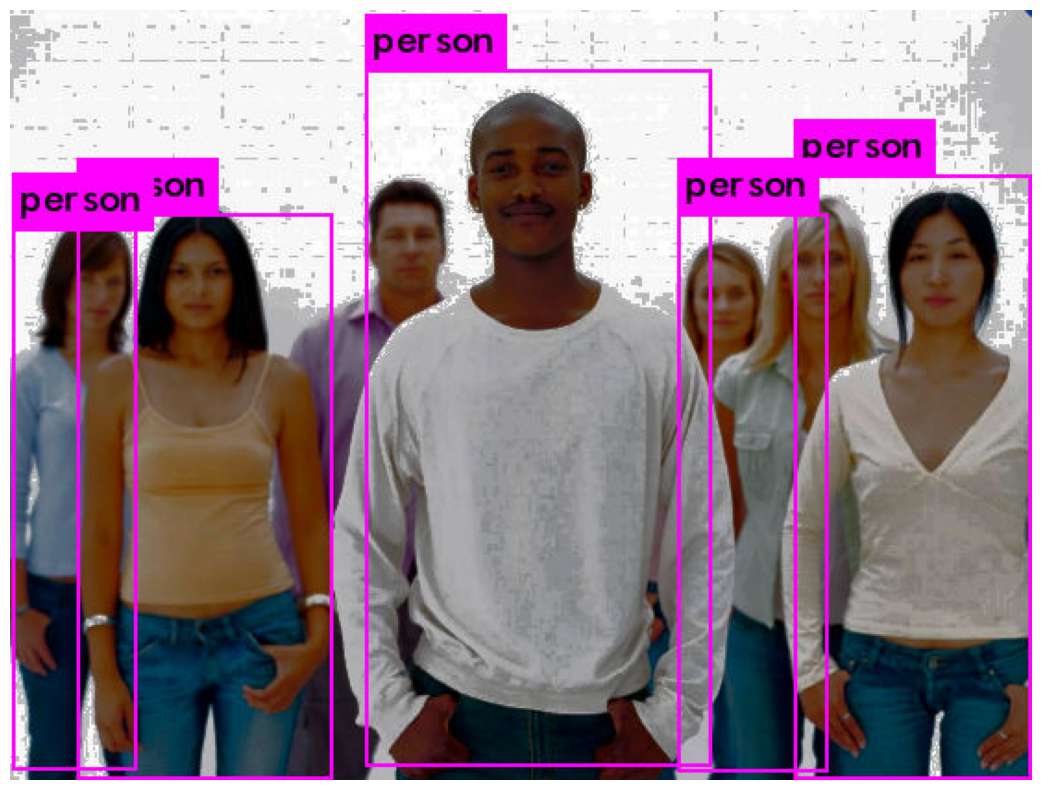

In [ ]:
import subprocess

# Realiza a detecção e armazena a saída em uma variável
result = subprocess.run(
    ['./darknet', 'detect', 'cfg/yolov3-tiny.cfg', 'yolov3-tiny.weights', 'q02_red_eq.png', '-thresh', '0.5'],
    stdout=subprocess.PIPE,
    stderr=subprocess.PIPE,
    text=True
)

# Verificar o número de pessoas e a % para cada detecção
output = result.stdout
person_count = output.count("person")

print(output)
print(f"Número de pessoas detectadas: {person_count}")

# Display da imagem pré processada (equalizada) com as detecções
display_image(read_image('predictions.jpg'))